In [3]:
import pandas as pd


In [4]:
file_path = r'c:/A5/cleaned_taxi2_2022.parquet'
df = pd.read_parquet(file_path)

In [5]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID
0,2022-07-01 00:20:06,2022-07-01 00:39:13,1.0,70,33
1,2022-07-01 00:29:11,2022-07-01 00:38:00,1.0,162,48
2,2022-07-01 00:03:56,2022-07-01 00:11:49,1.0,48,142
3,2022-07-01 00:15:50,2022-07-01 00:22:21,1.0,161,234
4,2022-07-01 00:53:53,2022-07-01 01:08:10,1.0,162,148


In [6]:
# Splitting the pickup and dropoff information into separate rows
pickup_df = df[['tpep_pickup_datetime', 'PULocationID', 'passenger_count']].rename(columns={'tpep_pickup_datetime': 'datetime', 'PULocationID': 'LocationID'})
dropoff_df = df[['tpep_dropoff_datetime', 'DOLocationID', 'passenger_count']].rename(columns={'tpep_dropoff_datetime': 'datetime', 'DOLocationID': 'LocationID'})

# Combining the two dataframes
combined_df = pd.concat([pickup_df, dropoff_df], ignore_index=True)

In [7]:
print(combined_df.head())
print(len(combined_df))

             datetime  LocationID  passenger_count
0 2022-07-01 00:20:06          70              1.0
1 2022-07-01 00:29:11         162              1.0
2 2022-07-01 00:03:56          48              1.0
3 2022-07-01 00:15:50         161              1.0
4 2022-07-01 00:53:53         162              1.0
35474498


In [8]:
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])
combined_df['date'] = combined_df['datetime'].dt.date

In [9]:
combined_df.head()

,datetime,LocationID,passenger_count,date
0,2022-07-01 00:20:06,70,1.0,2022-07-01
1,2022-07-01 00:29:11,162,1.0,2022-07-01
2,2022-07-01 00:03:56,48,1.0,2022-07-01
3,2022-07-01 00:15:50,161,1.0,2022-07-01
4,2022-07-01 00:53:53,162,1.0,2022-07-01


In [10]:
combined_df.drop(columns=['datetime'])

,LocationID,passenger_count,date
0,70,1.0,2022-07-01
1,162,1.0,2022-07-01
2,48,1.0,2022-07-01
3,161,1.0,2022-07-01
4,162,1.0,2022-07-01
...,...,...,...
35474493,7,1.0,2022-12-31
35474494,142,1.0,2022-12-31
35474495,141,1.0,2022-12-31
35474496,142,1.0,2022-12-31


In [11]:
grouped_df = combined_df.groupby(['LocationID', 'date'], as_index=False)['passenger_count'].sum()
print(grouped_df.head())

   LocationID        date  passenger_count
0           2  2022-07-28              1.0
1           2  2022-08-15              1.0
2           2  2022-08-17              1.0
3           2  2022-08-19              2.0
4           2  2022-08-20              1.0


In [12]:
parquet_file_path = 'c:/A5/new_taxi20222.parquet'
grouped_df.to_parquet(parquet_file_path, engine='pyarrow', index=False)

Reading in a static nta file

In [13]:
nta = pd.read_csv('c:/A/nta.csv')
print(nta.head())

                                            the_geom  BoroCode  BoroName  \
0  MULTIPOLYGON (((-73.9321339742769 40.728159603...         3  Brooklyn   
1  MULTIPOLYGON (((-73.95814292363964 40.72440428...         3  Brooklyn   
2  MULTIPOLYGON (((-73.95023693669857 40.70547324...         3  Brooklyn   
3  MULTIPOLYGON (((-73.9240590965993 40.714111560...         3  Brooklyn   
4  MULTIPOLYGON (((-73.99236366911195 40.68969012...         3  Brooklyn   

   CountyFIPS NTA2020             NTAName  NTAAbbrev  NTAType CDTA2020  \
0          47  BK0101          Greenpoint      Grnpt        0     BK01   
1          47  BK0102        Williamsburg   Wllmsbrg        0     BK01   
2          47  BK0103  South Williamsburg  SWllmsbrg        0     BK01   
3          47  BK0104   East Williamsburg  EWllmsbrg        0     BK01   
4          47  BK0201    Brooklyn Heights      BkHts        0     BK02   

                                            CDTAName    Shape_Leng  \
0     BK01 Williamsburg-Gree

Checking the columns in the location shape file to see what is suitable to merger on

In [14]:
import geopandas as gpd
from shapely.geometry import Point
location_coords = pd.read_csv('c:/A/taxi_zones.csv')
print(location_coords.head())

# Load the location coordinates file as GeoDataFrame
location_coords_gdf = gpd.read_file('c:/A/location.shp')  # Adjust the path

print(location_coords_gdf.columns)

   OBJECTID  Shape_Leng                                           the_geom  \
0         1    0.116357  MULTIPOLYGON (((-74.18445299999996 40.69499599...   
1         2    0.433470  MULTIPOLYGON (((-73.82337597260663 40.63898704...   
2         3    0.084341  MULTIPOLYGON (((-73.84792614099985 40.87134223...   
3         4    0.043567  MULTIPOLYGON (((-73.97177410965318 40.72582128...   
4         5    0.092146  MULTIPOLYGON (((-74.17421738099989 40.56256808...   

   Shape_Area                     zone  LocationID        borough  
0    0.000782           Newark Airport           1            EWR  
1    0.004866              Jamaica Bay           2         Queens  
2    0.000314  Allerton/Pelham Gardens           3          Bronx  
3    0.000112            Alphabet City           4      Manhattan  
4    0.000498            Arden Heights           5  Staten Island  
Index(['borough', 'location_i', 'objectid', 'shape_area', 'shape_leng', 'zone',
       'geometry'],
      dtype='object')


Mergin the taxi and Nta shape files

In [15]:
import geopandas as gpd
from shapely.geometry import Point
location_coords = pd.read_csv('c:/A/taxi_zones.csv')
print(location_coords.head())

# Load the location coordinates file as GeoDataFrame
location_coords_gdf = gpd.read_file('c:/A/location.shp')  

# Getting centroids to make the data compatble
location_coords_gdf['longitude'] = location_coords_gdf.geometry.centroid.x
location_coords_gdf['latitude'] = location_coords_gdf.geometry.centroid.y

# Merging on these columns
location_coords = location_coords_gdf[['location_i', 'longitude', 'latitude']]

# taxi data
grouped_df = pd.read_parquet('c:/A1/new_taxi20232.parquet')  
grouped_df = grouped_df.rename(columns={'LocationID': 'location_i'})

# Merge the taxi data with location coordinates
grouped_with_coords = pd.merge(grouped_df, location_coords, on='location_i', how='left')

# Converting the merged DataFrame to a GeoDataFrame
grouped_with_coords['geometry'] = grouped_with_coords.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
grouped_gdf = gpd.GeoDataFrame(grouped_with_coords, geometry='geometry')
grouped_gdf.set_crs(epsg=4326, inplace=True)

# Load the NTA shapefile
nta_gdf = gpd.read_file('c:/A/nyct2020_24b/nyct2020_24b/nyct2020.shp')

# Perform spatial join to find the corresponding NTA for each pickup location
result_gdf = gpd.sjoin(grouped_gdf, nta_gdf, how='left', op='intersects')

# Now your result_gdf contains the NTA information
print(result_gdf.head())
result_gdf['date'] = result_gdf['date'].astype(str)

result_gdf.to_file('c:/A/taxi3.geojson', driver='GeoJSON')


   OBJECTID  Shape_Leng                                           the_geom  \
0         1    0.116357  MULTIPOLYGON (((-74.18445299999996 40.69499599...   
1         2    0.433470  MULTIPOLYGON (((-73.82337597260663 40.63898704...   
2         3    0.084341  MULTIPOLYGON (((-73.84792614099985 40.87134223...   
3         4    0.043567  MULTIPOLYGON (((-73.97177410965318 40.72582128...   
4         5    0.092146  MULTIPOLYGON (((-74.17421738099989 40.56256808...   

   Shape_Area                     zone  LocationID        borough  
0    0.000782           Newark Airport           1            EWR  
1    0.004866              Jamaica Bay           2         Queens  
2    0.000314  Allerton/Pelham Gardens           3          Bronx  
3    0.000112            Alphabet City           4      Manhattan  
4    0.000498            Arden Heights           5  Staten Island  


C:\Users\Kevin\AppData\Local\Temp\ipykernel_10420\16456777.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location_coords_gdf['longitude'] = location_coords_gdf.geometry.centroid.x
C:\Users\Kevin\AppData\Local\Temp\ipykernel_10420\16456777.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location_coords_gdf['latitude'] = location_coords_gdf.geometry.centroid.y
C:\Users\Kevin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3488: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Kevin\AppData\Local\Temp\ipykernel_10420\1645677

   location_i        date  passenger_count  longitude   latitude  \
0           2  2022-02-06              1.0 -73.831299  40.616745   
1           2  2022-02-16              1.0 -73.831299  40.616745   
2           2  2022-02-23              5.0 -73.831299  40.616745   
3           2  2022-03-22              1.0 -73.831299  40.616745   
4           2  2022-03-28              1.0 -73.831299  40.616745   

                     geometry  index_right CTLabel BoroCode BoroName  ...  \
0  POINT (-73.83130 40.61675)          NaN     NaN      NaN      NaN  ...   
1  POINT (-73.83130 40.61675)          NaN     NaN      NaN      NaN  ...   
2  POINT (-73.83130 40.61675)          NaN     NaN      NaN      NaN  ...   
3  POINT (-73.83130 40.61675)          NaN     NaN      NaN      NaN  ...   
4  POINT (-73.83130 40.61675)          NaN     NaN      NaN      NaN  ...   

  BoroCT2020 CDEligibil NTAName NTA2020 CDTA2020 CDTANAME GEOID PUMA  \
0        NaN        NaN     NaN     NaN      NaN      Na

Plotting the taxi passenger count to the Neighbourhood tabulation area

AttributeError: 'NoneType' object has no attribute 'set_bbox_to_anchor'

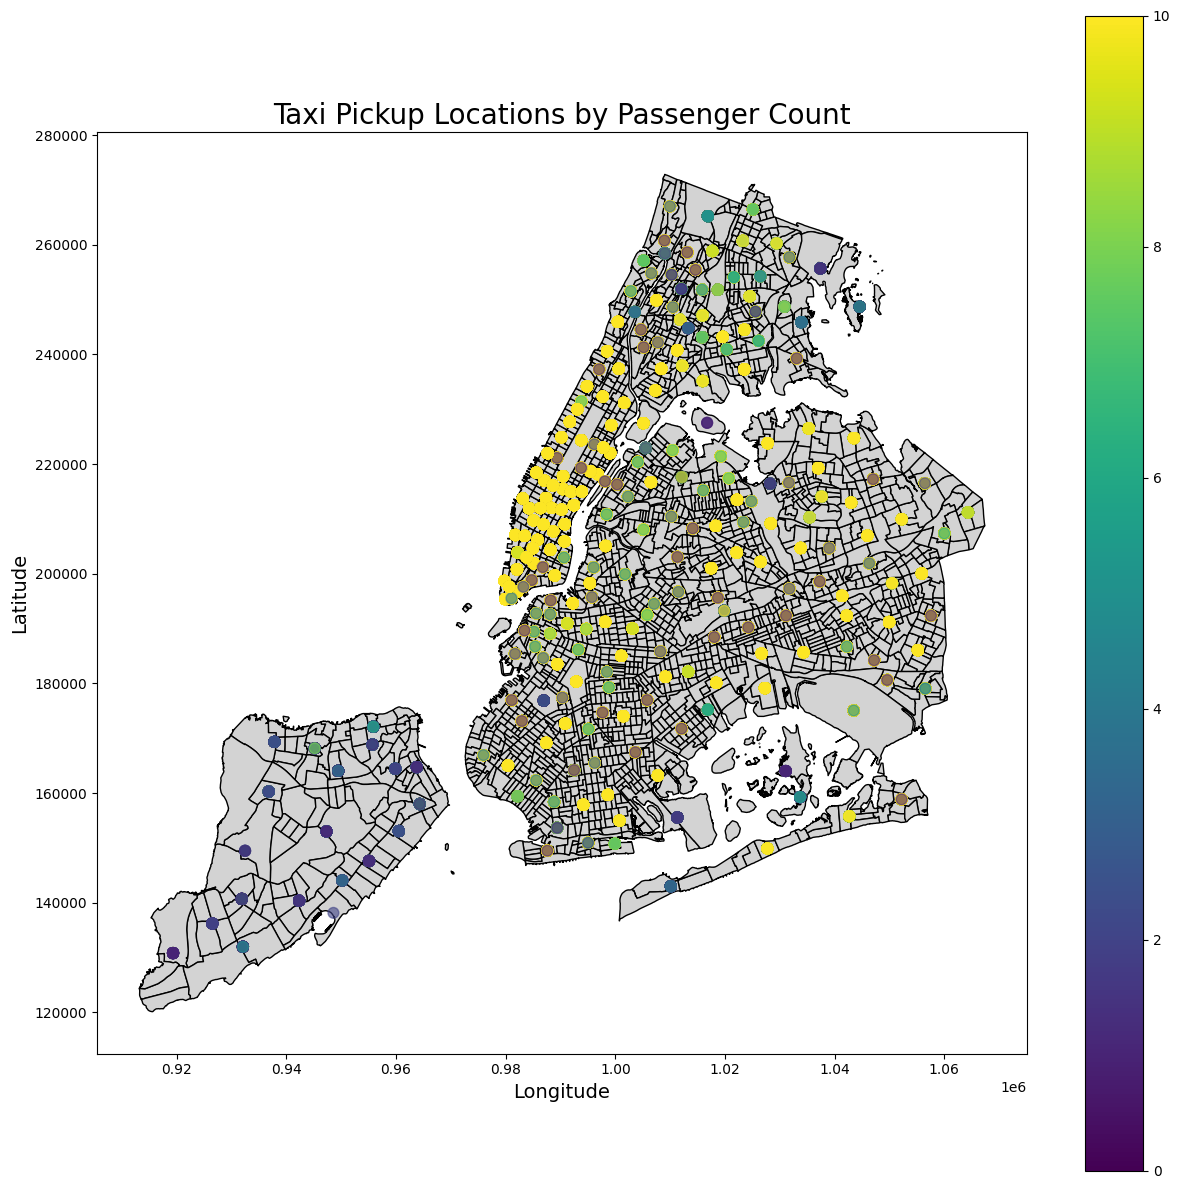

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Load your data
result_gdf = gpd.read_file('c:/A/taxi3.geojson')
merged_gdf = gpd.GeoDataFrame(result_gdf, geometry='geometry')
merged_gdf.set_crs(epsg=4326, inplace=True)  # Assuming your data is in WGS 84

nta_gdf = gpd.read_file('c:/A/nyct2020_24b/nyct2020_24b/nyct2020.shp')

# Check the CRS and convert if necessary
if merged_gdf.crs != nta_gdf.crs:
    merged_gdf = result_gdf.to_crs(nta_gdf.crs)

# Create a normalization object
norm = Normalize(vmin=0, vmax=10)  # Adjust vmin and vmax based on your data range

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot NTA boundaries
nta_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot pickup locations with normalization for the color scale
merged_gdf.plot(ax=ax, column='passenger_count', cmap='viridis', markersize=60, alpha=0.6, legend=True, norm=norm)

plt.title('Taxi Pickup Locations by Passenger Count', fontsize=20)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
legend.set_title('Passenger Count', prop={'size': 15})

plt.tight_layout()
plt.show()

